In [13]:
from google.colab import files
import pandas as pd

# Charger le fichier CSV
uploaded = files.upload()

# Lire le fichier'tennis_articles.csv'
df = pd.read_csv("tennis_articles.csv", encoding="latin1")

# Afficher les premières lignes
print(df.head())

Saving tennis_articles.csv to tennis_articles (1).csv
   article_id                                      article_title  \
0           1  I do not have friends in tennis, says Maria Sh...   
1           2  Federer defeats Medvedev to advance to 14th Sw...   
2           3  Tennis: Roger Federer ignored deadline set by ...   
3           4  Nishikori to face off against Anderson in Vien...   
4           5  Roger Federer has made this huge change to ten...   

                                        article_text  \
0  Maria Sharapova has basically no friends as te...   
1  BASEL, Switzerland (AP)  Roger Federer advanc...   
2  Roger Federer has revealed that organisers of ...   
3  Kei Nishikori will try to end his long losing ...   
4  Federer, 37, first broke through on tour over ...   

                                              source  
0  https://www.tennisworldusa.org/tennis/news/Mar...  
1  http://www.tennis.com/pro-game/2018/10/copil-s...  
2  https://scroll.in/field/899938/t

In [14]:
print(df.isnull().sum())  # Nombre de valeurs NaN par colonne


article_id       0
article_title    0
article_text     0
source           0
dtype: int64


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_id     8 non-null      int64 
 1   article_title  8 non-null      object
 2   article_text   8 non-null      object
 3   source         8 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes
None


In [16]:
print(df.columns)


Index(['article_id', 'article_title', 'article_text', 'source'], dtype='object')


In [17]:
print(df.describe())


       article_id
count     8.00000
mean      4.50000
std       2.44949
min       1.00000
25%       2.75000
50%       4.50000
75%       6.25000
max       8.00000


In [18]:
#Supprimez les colonnes inutiles
df = df.drop(columns=["article_id", "article_title", "source"])

In [19]:
print(df.columns)

Index(['article_text'], dtype='object')


In [20]:
print(df["article_text"].head(10))  # Affiche les 10 premières valeurs


0    Maria Sharapova has basically no friends as te...
1    BASEL, Switzerland (AP)  Roger Federer advanc...
2    Roger Federer has revealed that organisers of ...
3    Kei Nishikori will try to end his long losing ...
4    Federer, 37, first broke through on tour over ...
5    Nadal has not played tennis since he was force...
6    Tennis giveth, and tennis taketh away. The end...
7    I PLAYED golf last week with Todd Reid. He pic...
Name: article_text, dtype: object


In [21]:
import requests
import re
import nltk
import spacy
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag, ne_chunk

In [22]:
# Téléchargement des ressources NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading packag

True

In [23]:
from nltk.tokenize import sent_tokenize

# Appliquer la tokenisation phrase par phrase
df["sentences"] = df["article_text"].apply(sent_tokenize)

# Afficher un exemple de phrases tokenisées
print(df["sentences"].head())


0    [Maria Sharapova has basically no friends as t...
1    [BASEL, Switzerland (AP)  Roger Federer advan...
2    [Roger Federer has revealed that organisers of...
3    [Kei Nishikori will try to end his long losing...
4    [Federer, 37, first broke through on tour over...
Name: sentences, dtype: object


In [24]:
print(df["sentences"].iloc[0])  # Affiche les phrases du premier article

['Maria Sharapova has basically no friends as tennis players on the WTA Tour.', "The Russian player has no problems in openly speaking about it and in a recent interview she said: 'I don't really hide any feelings too much.", 'I think everyone knows this is my job here.', "When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.", "So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match.", "I'm a pretty competitive girl.", "I say my hellos, but I'm not sending any players flowers as well.", "Uhm, I'm not really friendly or close to many players.", "I have not a lot of friends away from the courts.'", 'When she said she is not really close to a lot of players, is that something strategic that she is doing?', "Is it different on the men's tour than the women's tour?", "'No, not at all.", "I 

In [25]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-03-16 22:12:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-16 22:12:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-16 22:12:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [26]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [27]:
import numpy as np

# Fonction pour charger les embeddings GloVe
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Charger le fichier GloVe 100d
glove_file = "glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_file)

# Vérifier quelques exemples d'embeddings
print(list(glove_embeddings.items())[:5])  # Afficher les 5 premiers mots et leurs embeddings

[('the', array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0

In [28]:
word = "tennis"
embedding = glove_embeddings.get(word, None)

if embedding is not None:
    print(f"Embedding for '{word}':")
    print(embedding)
else:
    print(f"'{word}' not found in GloVe embeddings.")


Embedding for 'tennis':
[ 0.21508    0.61981    0.84039    0.71394   -0.29904    0.56481
  0.18241    0.76767   -0.75897   -0.056711   0.43726   -0.39217
 -0.14874    0.19475   -0.69581    0.58388    0.20625    0.36635
 -0.36793    0.68765   -0.5191     0.92246    0.6831     0.92039
  0.31221    0.10465    0.253     -1.9131     0.67281    0.38894
 -0.88199    0.22536    0.027648  -0.55574    0.43641   -0.18579
 -1.3131     1.1555    -1.2937    -0.46866    0.16292   -0.28636
  0.25793   -1.3538     0.28808   -0.040711   0.027864   0.21767
  0.8588    -0.98463   -0.73366   -0.6457     0.61292    0.23316
  0.42164   -1.8037    -0.0055624  1.0998     0.9493     1.0987
 -0.52362    0.49657   -0.23824    0.52824   -0.54642   -0.48527
 -0.42944    0.25497   -0.16199    0.018633   0.12416   -0.13436
 -0.082436  -0.042168  -0.13114    0.14133    1.6365     0.091678
  0.23484    0.20629    1.137     -0.62595    0.35945   -0.048956
 -0.28317   -0.28228   -1.2076     0.36512    0.017695   0.14114


In [29]:
def clean_text(text):
    # Supprimer les chiffres, la ponctuation et les caractères spéciaux
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Garde uniquement les lettres et les espaces
    text = text.lower()  # Mettre en minuscule
    return text


In [30]:
df['cleaned_sentences'] = df['sentences'].apply(lambda x: [clean_text(sentence) for sentence in x])

# Afficher les premières phrases nettoyées
print(df['cleaned_sentences'].head())


0    [maria sharapova has basically no friends as t...
1    [basel switzerland ap  roger federer advanced ...
2    [roger federer has revealed that organisers of...
3    [kei nishikori will try to end his long losing...
4    [federer  first broke through on tour over two...
Name: cleaned_sentences, dtype: object


In [32]:
# Charger la liste des stopwords en français
stop_words = set(stopwords.words('french'))


In [33]:
def remove_stopwords(text):
    words = word_tokenize(text)  # Tokeniser en mots
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Supprimer les stopwords
    return " ".join(filtered_words)  # Reformer le texte sans stopwords
df['article_text_clean'] = df['article_text'].astype(str).apply(remove_stopwords)


In [35]:
# Fonction pour obtenir la moyenne des embeddings d'une phrase
def get_mean_embedding(text, embeddings_index):
    tokens = word_tokenize(text)  # Tokenisation
    embeddings = []

    for word in tokens:
        if word in embeddings_index:  # Si le mot est dans GloVe
            embeddings.append(embeddings_index[word])

    # Si des embeddings ont été trouvés, calculer la moyenne
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(100)  # Si aucun mot n'a d'embedding, retourner un vecteur nul de dimension 100

# Appliquer la vectorisation sur chaque texte
df['article_vectors'] = df['article_text_clean'].apply(lambda x: get_mean_embedding(x, glove_embeddings))

# Afficher les premières lignes avec les vecteurs moyens
print(df['article_vectors'].head())


0    [-0.06480284, 0.2748658, 0.47881317, -0.321728...
1    [-0.022544961, 0.028385667, 0.41650832, -0.118...
2    [-0.07782856, 0.12018673, 0.37100837, -0.24322...
3    [0.013366812, 0.043887965, 0.46570382, -0.1719...
4    [-0.055547595, 0.17479847, 0.41480055, -0.2828...
Name: article_vectors, dtype: object


          0         1         2         3         4         5         6  \
0  1.000000  0.924530  0.973032  0.930066  0.988322  0.957525  0.967563   
1  0.924530  1.000000  0.966172  0.995279  0.962387  0.980768  0.969696   
2  0.973032  0.966172  1.000000  0.974360  0.989822  0.991496  0.984598   
3  0.930066  0.995279  0.974360  1.000000  0.966828  0.985664  0.974697   
4  0.988322  0.962387  0.989822  0.966828  1.000000  0.981690  0.985079   

          7  
0  0.973344  
1  0.974533  
2  0.990335  
3  0.976277  
4  0.993497  


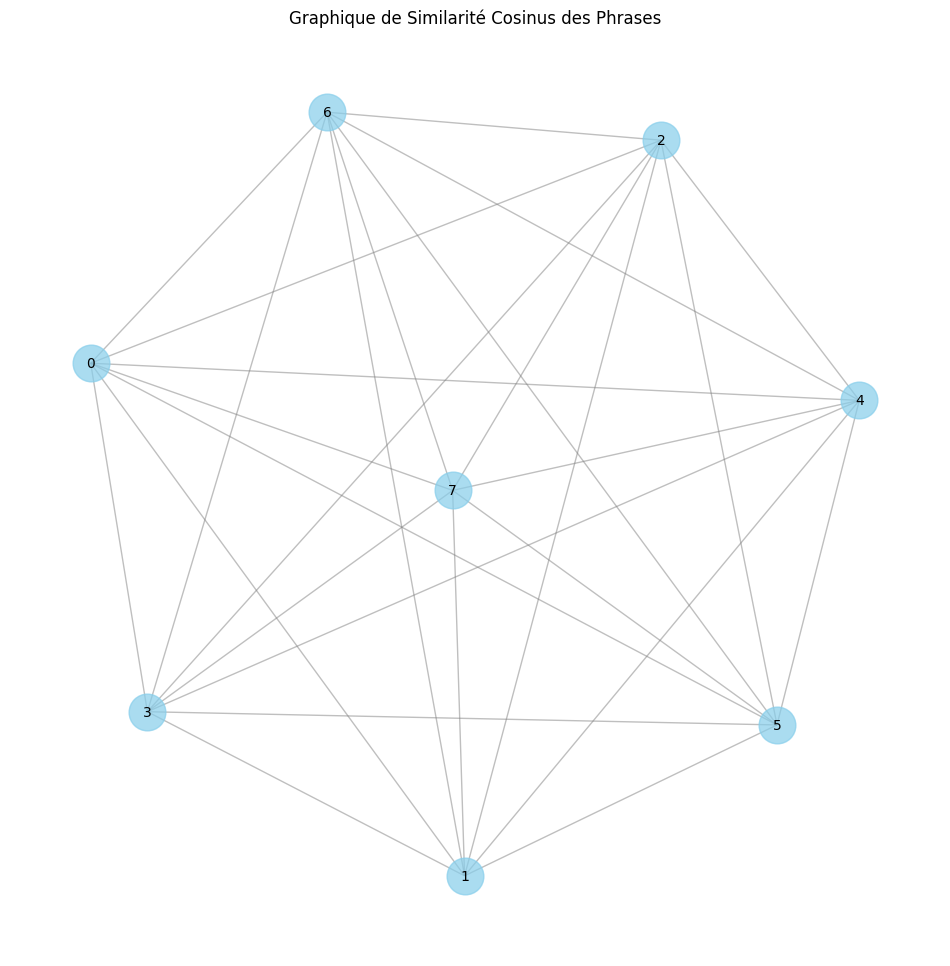

In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# 1. Calculer la similarité cosinus entre toutes les paires de vecteurs
similarity_matrix = cosine_similarity(list(df['article_vectors']))

# 2. Créer une matrice de similarité sous forme de DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

# Afficher les 10 premières lignes de la matrice de similarité
print(similarity_df.head())

# 3. Créer un graphique de similarité avec NetworkX
# Créer un graphe non orienté
G = nx.Graph()

# Ajouter des noeuds (chaque phrase est un noeud)
for i in range(len(df)):
    G.add_node(i, label=df['article_text_clean'][i])

# Ajouter des arêtes (si la similarité entre deux phrases est > à un seuil, ajoute une arête)
threshold = 0.8  # Seuil de similarité pour ajouter une arête

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if similarity_matrix[i][j] > threshold:  # Seuil de similarité
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# 4. Dessiner le graphe
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)  # Positionnement des noeuds
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color="gray")
plt.title("Graphique de Similarité Cosinus des Phrases")
plt.axis('off')
plt.show()


In [39]:
import networkx as nx

N = 7
# 1. Appliquer l'algorithme PageRank
pagerank_scores = nx.pagerank(G)

# 2. Trier les phrases en fonction des scores PageRank (du plus élevé au plus bas)
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# 3. Extraire les N premières phrases pour le résumé
top_n_sentences = [df['article_text_clean'][i] for i, _ in sorted_pagerank[:N]]

# Afficher le résumé
print("Résumé basé sur les scores PageRank :\n")
for i, sentence in enumerate(top_n_sentences, 1):
    print(f"{i}. {sentence}")


Résumé basé sur les scores PageRank :

1. I PLAYED golf last week with Todd Reid . He picked up at 5.30am , half an hour early because he couldnt sleep . Or hadnt slept , to be specific . Not because hed been out a bender or anything  those days were in the past . The former Wimbledon junior champion was full of hope , excited about getting his life back together after a troubled few years and a touch-and-go battle with pancreatitis . Im pleased with that ,  he said after grinding out an eight-over-par front nine at the not-so-royal Northbridge club in Sydney and smashing down an egg- and-bacon roll at the halfway house . To most players of his rare sporting gifts , such a modest return would be unacceptable . To Reid the 15-marker , just being up and at em was enough ; a few bogeys and one well-made  broomstick putter and all  vindication for his recent decision to renew his membership at nearby Bankstown . Exhausted after spending half his round deep in the bushes searching